# import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


# Read Data & Understanding

In [3]:
df = pd.read_csv(r"C:\Users\Mohamed\Desktop\Iris_data\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

# Remove Unnecessary columns(Id_column)

In [6]:
columns = df.columns.tolist()
columns.pop(columns.index("Id"))
df = df[columns]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Check for Dtypes/Num_Unique/Null_values/Null_Ratio

In [7]:
pd.DataFrame({"Dtype": df.dtypes, "Num_Unique": df.nunique(), "Null_values": df.isnull().sum(),
              "Null_Ratio": df.isnull().sum() / df.shape[0]}).T

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Dtype,float64,float64,float64,float64,object
Num_Unique,35,23,43,22,3
Null_values,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0


## change Species_column from object type to category type

In [8]:
df["Species"] = df["Species"].astype('category')


In [9]:
pd.DataFrame({"Dtype": df.dtypes}).T

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Dtype,float64,float64,float64,float64,category


# check for Outlires

<AxesSubplot:xlabel='SepalLengthCm'>

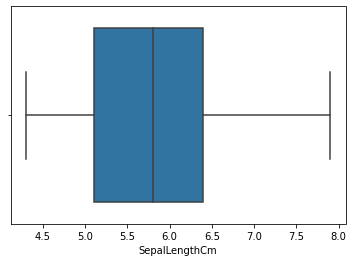

In [10]:
sns.boxplot(df["SepalLengthCm"])


<AxesSubplot:xlabel='SepalWidthCm'>

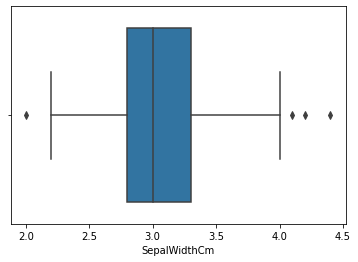

In [11]:
sns.boxplot(df["SepalWidthCm"])

<AxesSubplot:xlabel='PetalLengthCm'>

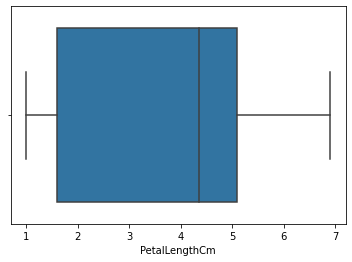

In [12]:
sns.boxplot(df["PetalLengthCm"])

<AxesSubplot:xlabel='PetalWidthCm'>

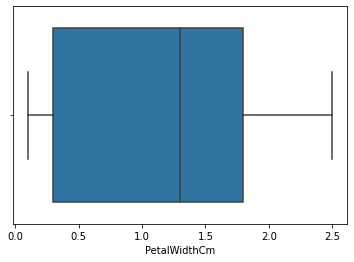

In [13]:
sns.boxplot(df["PetalWidthCm"])

## Upper&Lower outliers for SepalWidthCm data

In [14]:
Q1 = np.quantile(df["SepalWidthCm"], .25)
Q3 = np.quantile(df["SepalWidthCm"], .75)
IQR = Q3 - Q1
Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR
print(Upper)
print(Lower)

4.05
2.05


In [15]:
outliers = df[df.SepalWidthCm > Upper].SepalWidthCm.values
df.SepalWidthCm.replace(outliers,Upper,inplace=True)

outliers = df[df.SepalWidthCm < Lower].SepalWidthCm.values
df.SepalWidthCm.replace(outliers,Lower,inplace=True)

## check after remove outliers

<AxesSubplot:xlabel='SepalWidthCm'>

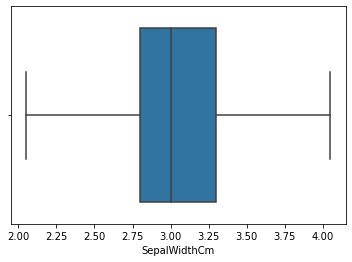

In [16]:
sns.boxplot(df["SepalWidthCm"])

# Check for duplicates

In [17]:
df.duplicated().sum()

3

In [18]:
df.drop_duplicates(inplace=True,keep="first")
print(df.duplicated().sum())

0


# Get Stats about Data


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.30,5.1,5.8,6.4,7.90
SepalWidthCm,147.0,3.052381,0.426331,2.05,2.8,3.0,3.3,4.05
PetalLengthCm,147.0,3.780272,1.759111,1.00,1.6,4.4,5.1,6.90
PetalWidthCm,147.0,1.208844,0.757874,0.10,0.3,1.3,1.8,2.50


# More Visualization

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## relationship between Two Numerical Data 

<function matplotlib.pyplot.show(close=None, block=None)>

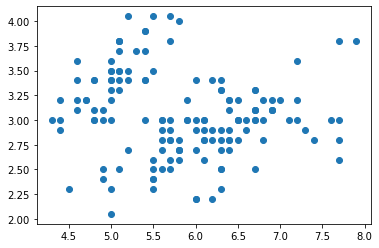

In [21]:
plt.scatter(df.SepalLengthCm , df.SepalWidthCm)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

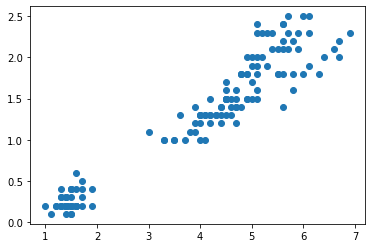

In [22]:
plt.scatter(df.PetalLengthCm , df.PetalWidthCm)
plt.show

## Relationship between the Target(categorical data)& other columns(Numerical data)

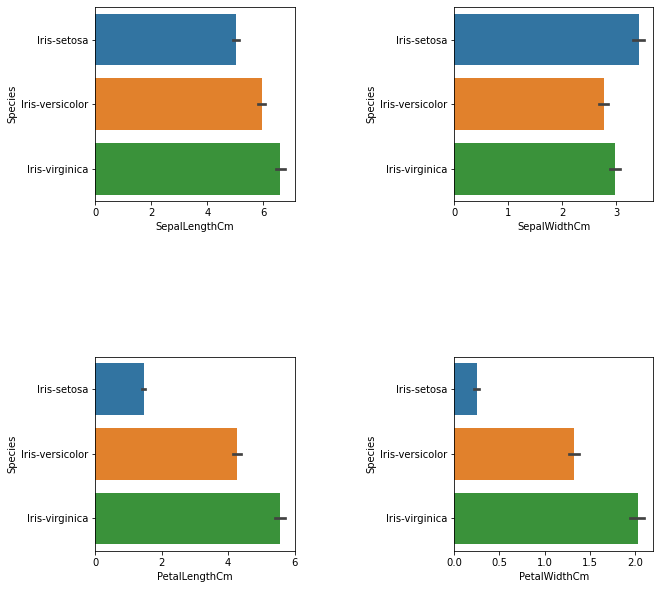

In [23]:
plt.figure(figsize=(10,10))
Num_data=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
for i ,col  in enumerate(df[Num_data]):
    plt.subplot(2,2,i+1)
    sns.barplot(x=df[col] , y=df["Species"])
    
    
plt.subplots_adjust(hspace=0.8 , wspace= 0.8)    
plt.show()    

# Data Split

In [24]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Normilization

In [27]:
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes("number").columns
scaler.fit(df[numerical_cols])
df[numerical_cols] = scaler.transform(df[numerical_cols])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.725,0.067797,0.041667,Iris-setosa
1,0.166667,0.475,0.067797,0.041667,Iris-setosa
2,0.111111,0.575,0.050847,0.041667,Iris-setosa
3,0.083333,0.525,0.084746,0.041667,Iris-setosa
4,0.194444,0.775,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,Iris-virginica
146,0.555556,0.225,0.677966,0.750000,Iris-virginica
147,0.611111,0.475,0.711864,0.791667,Iris-virginica
148,0.527778,0.675,0.745763,0.916667,Iris-virginica


# Encoding

### I want to get unique values from Species_column:

In [28]:
df['Species']. unique() 

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [29]:
y_train=pd.get_dummies(y_train, columns=["Species"],drop_first=True)

y_val=pd.get_dummies(y_val, columns=["Species"],drop_first=True)

y_test=pd.get_dummies(y_test, columns=["Species"],drop_first=True)

y_train

,Species_Iris-versicolor,Species_Iris-virginica
95,1,0
40,0,0
15,0,0
24,0,0
45,0,0
...,...,...
118,0,1
58,1,0
90,1,0
82,1,0


In [30]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
127,6.1,3.0,4.9,1.8
53,5.5,2.3,4.0,1.3
140,6.7,3.1,5.6,2.4
19,5.1,3.8,1.5,0.3
106,4.9,2.5,4.5,1.7
12,4.8,3.0,1.4,0.1
78,6.0,2.9,4.5,1.5
31,5.4,3.4,1.5,0.4
83,6.0,2.7,5.1,1.6
9,4.9,3.1,1.5,0.1


# Bulids the Model

## KNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

**Train the model**

In [32]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Evaluation**

In [33]:
from sklearn.metrics import accuracy_score

y_tr_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)

tr_acc = accuracy_score(y_train, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print(tr_acc)
print(val_acc)

0.978494623655914
1.0


# KNN Model is a Goodfitting model